# Assignment 4: Simulating Income
### Mengchen Shi
##### mshi17@uchicago.edu

### Question 1

Text(0,0.5,'Annual income (\\$s)')

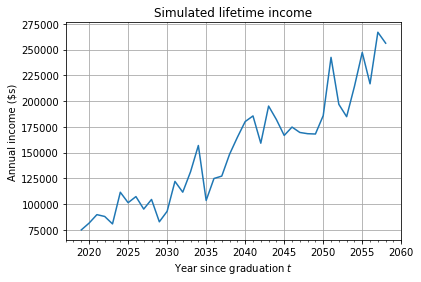

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def lifetime_income_sim(p):
    '''
    p = {'mean': 0,
    'sd': 0.1,
    'start_yr': int(2019),
    'work_yr': 40,
    'rho': 0.2, 
    'gr': 0.03,
    'inc0': 80000,
    'num_draws': 10000}
    '''

    #set random seed

    np.random.seed(524)
    errors = np.random.normal(p['mean'], p['sd'], (p['work_yr'], p['num_draws']))
    ln_inc_mat = np.zeros((p['work_yr'], p['num_draws']))
    ln_inc_mat[0, :] = np.log(p['inc0']) + errors[0, :]

    for yr in range(1, p['work_yr']):
        ln_inc_mat[yr, :] = (1 - p["rho"]) * (np.log(p["inc0"]) \
                                              + p["gr"] * yr) + (p["rho"] * ln_inc_mat[yr - 1, :]) \
                                              + errors[yr, :]

    inc_mat = np.exp(ln_inc_mat)
    return inc_mat


%matplotlib inline
p = {'mean': 0,
    'sd': 0.1,
    'start_yr': int(2019),
    'work_yr': 40,
    'rho': 0.2, 
    'gr': 0.03,
    'inc0': 80000,
    'num_draws': 10000}

inc_mat = lifetime_income_sim(p) # Simulation

year_x_axis = np.arange(p['start_yr'], p['start_yr'] + p['work_yr'])
random_simulation = np.random.randint(1, 10000)
fig, ax = plt.subplots()
plt.plot(year_x_axis, inc_mat[:, random_simulation])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Simulated lifetime income')
plt.xlabel(r'Year since graduation $t$')
plt.ylabel(r'Annual income (\$s)')


### Question 2

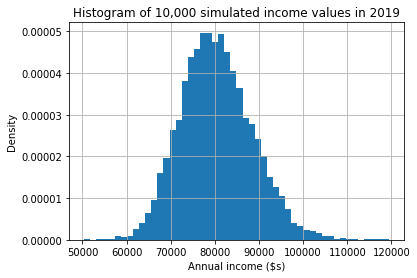

In [7]:
initial_inc = inc_mat[0]
plt.hist(initial_inc, bins = 50, density = True)
plt.grid(True)
plt.xlabel(r'Annual income (\$s)')
plt.ylabel('Density')
plt.title('Histogram of 10,000 simulated income values in 2019')
plt.show()

1.27% of MACSS class will earn more than $100,000 in the first year out of the program.
9.02% of the 'class' will earn less than $70,000.
According to the qq-plot below, the distribution is not normally distributed. It is right skewed.


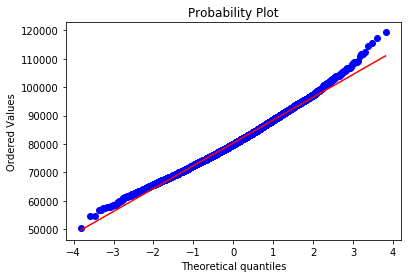

In [8]:
'''
What percent of your class will earn more than $100,000 in the first year out of the program? 
What percent of the 'class' will earn less than $70,000? 
Is the distribution normally distributed (i.e. symmetric and bell-curved)?
'''
inc1 = initial_inc[initial_inc > 100000]
perc1 = len(inc1)/p['num_draws'] * 100
print("{}% of MACSS class will earn more than $100,000 in the first year out of the program.".format(perc1))

inc2 = initial_inc[initial_inc < 70000]
perc2 = len(inc2)/p['num_draws'] * 100
print("{}% of the 'class' will earn less than $70,000.".format(perc2))
print("According to the qq-plot below, the distribution is not normally distributed. It is right skewed.")

import scipy.stats as stats
stats.probplot(initial_inc, dist="norm", plot=plt)
plt.show()

### Question 3

In 18.47 % of the simulations I will be able to pay off the loan in 10 years.


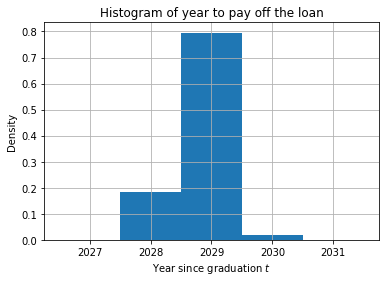

In [9]:
def paid_year(p):
    inc_mat = lifetime_income_sim(p)
    paid_yr = [2018] * p['num_draws']
    for j in range(p['num_draws']):
        debt = 95000
        for i in range(p['work_yr']):
            if debt > 0:
                paid_yr[j] += 1
                debt -= inc_mat[i, j] * 0.1
            else:
                break 
    return paid_yr
        
    
def paid_in_ten_years(paid_yr):
    years_paid = {}
    for year in paid_yr:
        years_paid[year] = years_paid.get(year, 0) + 1
    
    count = 0
    for yr, value in years_paid.items():
        if yr <= 2028:
            count += value
            
    perc = count / p["num_draws"] * 100
    print("In {:.2f} % of the simulations I will be able to pay off the loan in 10 years.".format(perc))


def hist_payoff_years(paid_yr):
    plt.grid(True)
    plt.hist(paid_yr, bins = np.arange(min(paid_yr) - 0.5, max(paid_yr) + 2, 1.0), density = True)
    plt.xticks(np.arange(min(paid_yr), max(paid_yr)+2, 1.0))
    plt.ylabel(r'Density')
    plt.xlabel(r'Year since graduation $t$')
    plt.title("Histogram of year to pay off the loan")
    plt.show()

paid_yr = paid_year(p)
paid_in_ten_years(paid_yr)
hist_payoff_years(paid_yr)

### Question 4

In 70.20 % of the simulations I will be able to pay off the loan in 10 years.


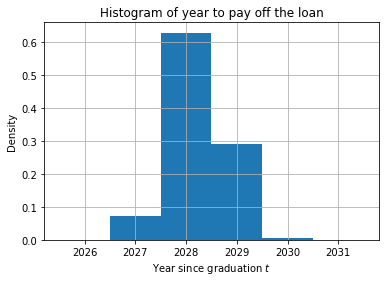

In [10]:
p1 = {'mean': 0,
     'sd': 0.15,
     'start_yr': int(2019),
     'work_yr': 40,
     'rho': 0.2, 
     'gr': 0.03,
     'inc0': 85000,
     'num_draws': 10000}

inc_mat1 = lifetime_income_sim(p1)
paid_yr1 = paid_year(p1)
paid_in_ten_years(paid_yr1)
hist_payoff_years(paid_yr1)